In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [149]:
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [150]:
df=pd.DataFrame(iris.data,columns=['sepal length','sepal width','petal length','petal width'])
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [151]:
x=df
y=pd.DataFrame(iris.target,columns=['target name'])
y

,target name
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [153]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [154]:
gn=GaussianNB()
gn.fit(x_train,y_train)
y_pred=gn.predict(x_test)
accuracy_score(y_test,y_pred)

/usr/local/lib64/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9666666666666667

In [155]:
# mn=MultinomialNB()
# mn.fit(x_train,y_train)
# y_pred=mn.predict(x_test)
# accuracy_score(y_test,y_pred)

In [156]:
from sklearn.metrics import confusion_matrix,classification_report

In [157]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]])

In [158]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

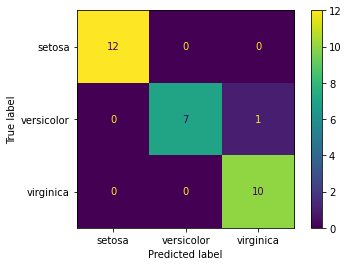

In [159]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=['setosa', 'versicolor', 'virginica']).plot()

In [160]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [161]:
precision_score(y_test,y_pred,average=None)

array([1.        , 1.        , 0.90909091])

In [164]:
TP,TN,FP,FN=cm[0,0],cm[1,1],cm[1,0],cm[0,1]
pos=TP+FP
neg=TN+FN
#Precision
P=TP/(TP+FP)

#recall
R=TP/(TP+FN)

#accuracy
A=(TP+TN)/(TP + TN + FP + FN) 

#f1-score
F1=2*P*R/(P+R)

error_rate=(FP+FN)/(pos+neg)

print(f"Precision: {P}")
print(f"Recall: {R}")
print(f"Accuracy: {A}")
print(f"F1-Score: {F1}")
print(f"Error Rate: {error_rate}")

Precision: 1.0
Recall: 1.0
Accuracy: 1.0
F1-Score: 1.0
Error Rate: 0.0
